<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [2]:
import os
import cv2
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras 
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

#### Define Constraints

In [3]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3

#### Load The Data

In [4]:
Class_Names = os.listdir('/kaggle/input/skin-issues-version-2-dataset-balanced/Skin v2')
Class_Names_dict = {name:idx for idx,name in enumerate(Class_Names)}
print(Class_Names_dict)

{'acne': 0, 'dark spots': 1, 'wrinkles': 2, 'pores': 3, 'blackheades': 4}


In [6]:
def load_data(data_dir):
    Images = []
    Labels = []

    for folder in os.listdir(data_dir):
        print(f"Load Images from {folder} File")
        for img in tqdm(os.listdir(os.path.join(data_dir,folder))):
            img_path = os.path.join(os.path.join(data_dir,folder),img)
            image = cv2.imread(img_path)
            image = cv2.resize(image , IMAGE_SIZE)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

            Images.append(image)
            Labels.append(Class_Names_dict[folder])
    
    Images = np.array(Images,dtype='float32')
    Labels = np.array(Labels,dtype='int64')
    
    return (Images , Labels)

Images , Labels = load_data('/kaggle/input/skin-issues-version-2-dataset-balanced/Skin v2')

Load Images from acne File


100%|██████████| 2060/2060 [00:14<00:00, 140.17it/s]


Load Images from dark spots File


100%|██████████| 2126/2126 [00:19<00:00, 107.09it/s]


Load Images from wrinkles File


100%|██████████| 1982/1982 [00:15<00:00, 131.08it/s]


Load Images from pores File


100%|██████████| 1632/1632 [00:11<00:00, 139.42it/s]


Load Images from blackheades File


100%|██████████| 1970/1970 [00:12<00:00, 156.69it/s]


#### Shuffle The Images

In [7]:
Images , Labels = shuffle(Images , Labels , random_state = 42)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Images and Get Insights</h2>
</div>

#### Number of Images

In [8]:
print(f"Number of Total Images {Images.shape[0]}")
print(f"Size of Images {Images.shape[1],Images.shape[2]}")

Number of Total Images 9770
Size of Images (256, 256)


#### Number of Each Class

In [9]:
print(f"Number of {Class_Names[0]} {len(Labels[Labels == 0])} Images")
print(f"Number of {Class_Names[1]} {len(Labels[Labels == 1])} Images")
print(f"Number of {Class_Names[2]} {len(Labels[Labels == 2])} Images")
print(f"Number of {Class_Names[3]} {len(Labels[Labels == 3])} Images")
print(f"Number of {Class_Names[4]} {len(Labels[Labels == 4])} Images")

Number of acne 2060 Images
Number of dark spots 2126 Images
Number of wrinkles 1982 Images
Number of pores 1632 Images
Number of blackheades 1970 Images


In [10]:
Train_Images , dummy_Images , Train_Labels , dummy_Labels = train_test_split(Images , Labels , test_size=0.3, random_state=42, stratify=Labels)
Val_Images , Test_Images , Val_Labels , Test_Labels = train_test_split(dummy_Images , dummy_Labels , test_size=0.5,
                                                                       random_state=42, stratify=dummy_Labels)

In [11]:
print(f"Number of Train Images {Train_Images.shape}")
print(f"Number of Train Labels {Train_Labels.shape}")
print(f"Number of Validation Images {Val_Images.shape}")
print(f"Number of Validation Labels {Val_Labels.shape}")
print(f"Number of Test Images {Test_Images.shape}")  
print(f"Number of Test Labels {Test_Labels.shape}")  

Number of Train Images (6839, 256, 256, 3)
Number of Train Labels (6839,)
Number of Validation Images (1465, 256, 256, 3)
Number of Validation Labels (1465,)
Number of Test Images (1466, 256, 256, 3)
Number of Test Labels (1466,)


In [12]:
_ , train_counts = np.unique(Train_Labels , return_counts=True)
_ , val_counts = np.unique(Val_Labels , return_counts=True)
_ , test_counts = np.unique(Test_Labels , return_counts=True)

df = pd.DataFrame({
    'Train': train_counts,'Validation': val_counts, 'Test': test_counts
}, index=Class_Names)

df

Train  Validation  Test
acne          1442         309   309
dark spots    1488         319   319
wrinkles      1387         297   298
pores         1143         245   244
blackheades   1379         295   296

<Figure size 1000x600 with 0 Axes>

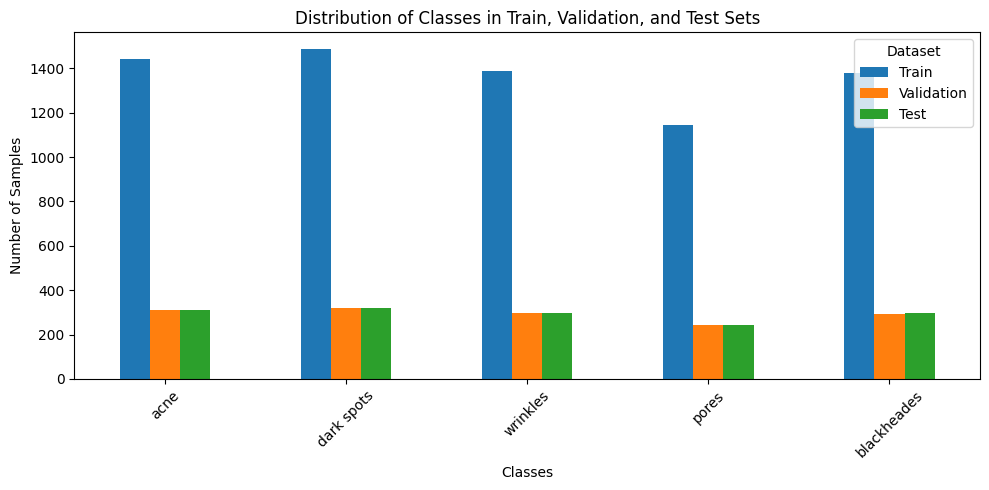

In [13]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar',figsize=(10,5))
plt.title('Distribution of Classes in Train, Validation, and Test Sets')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

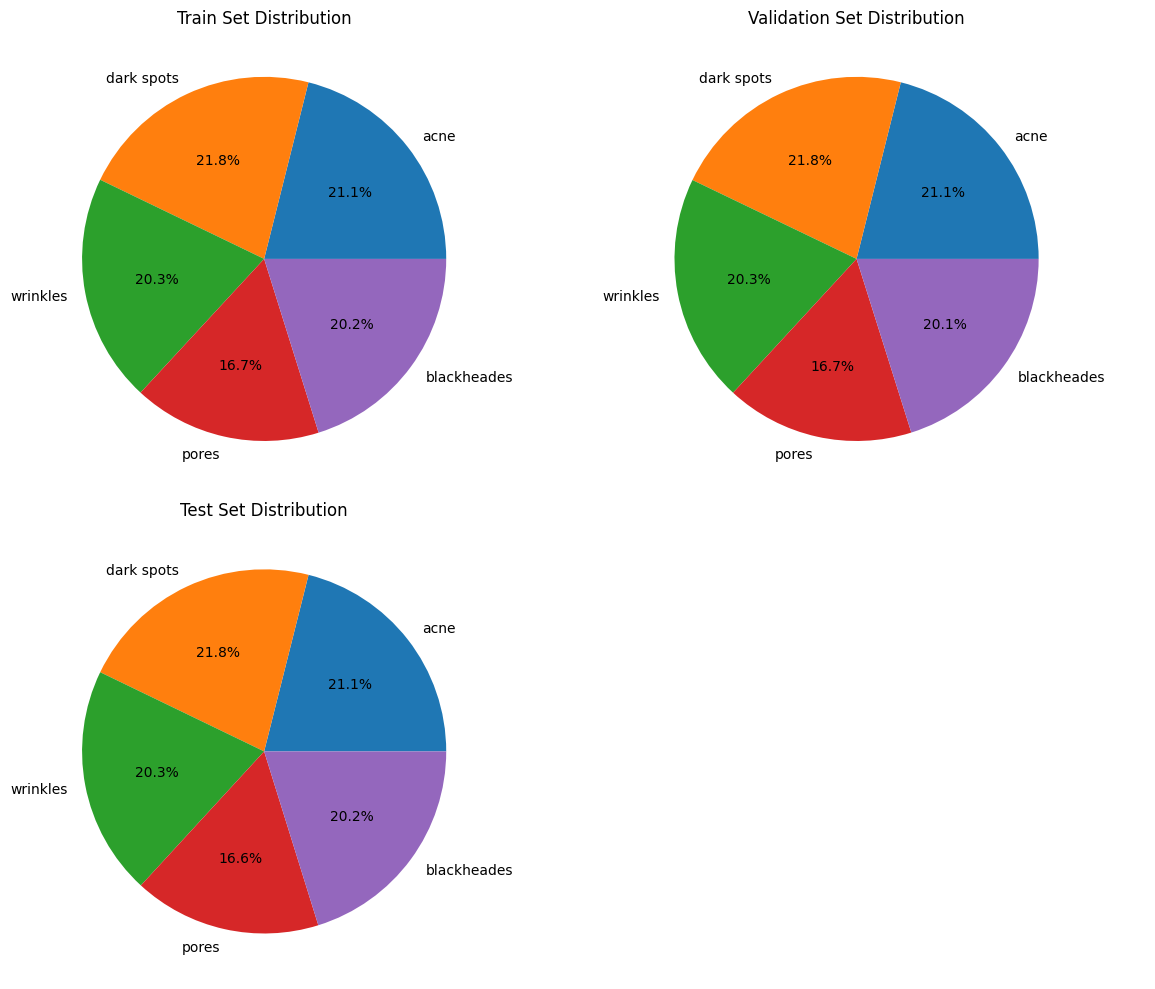

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

df.plot.pie(y='Train', autopct='%1.1f%%', title='Train Set Distribution', ax=axs[0,0], legend=False, ylabel='')
df.plot.pie(y='Validation', autopct='%1.1f%%', title='Validation Set Distribution', ax=axs[0,1], legend=False, ylabel='')
df.plot.pie(y='Test', autopct='%1.1f%%', title='Test Set Distribution', ax=axs[1,0], legend=False, ylabel='')

axs[1,1].axis('off')

plt.tight_layout()
plt.show()

#### Images In Dataset

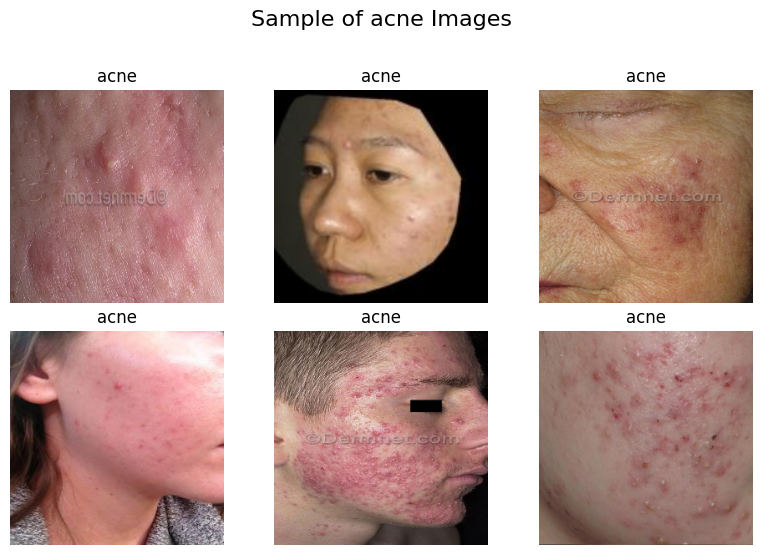

In [15]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[0]} Images', fontsize=16)

for i in range(6):
    plt.subplot(3, 3, i + 1)
    Category_List = np.where(Labels == 0)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  # Hide axis for cleaner look
    plt.title(f'{Class_Names[0]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)  # Adjust top to fit the suptitle
plt.show()

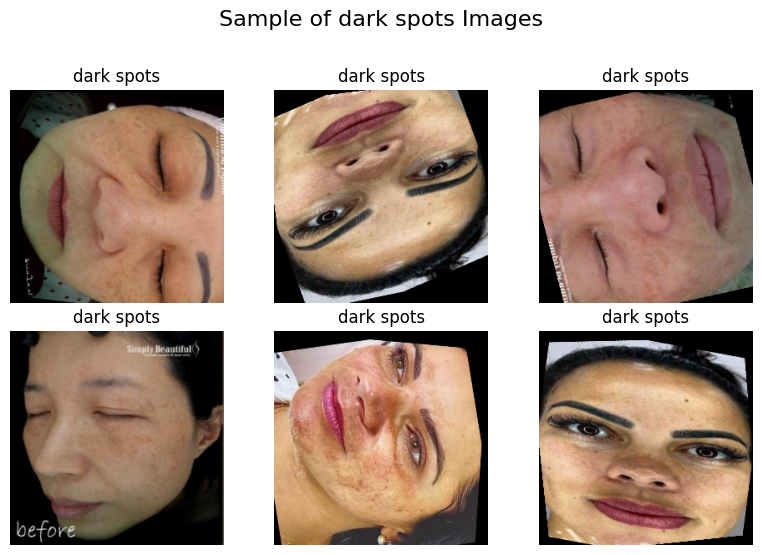

In [16]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[1]} Images', fontsize=16)

for i in range(6):
    plt.subplot(3, 3, i + 1)
    Category_List = np.where(Labels == 1)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  
    plt.title(f'{Class_Names[1]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

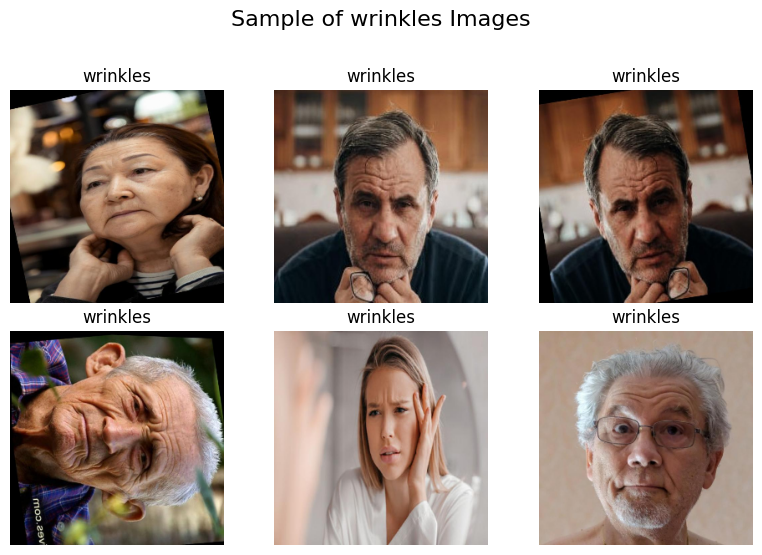

In [17]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[2]} Images', fontsize=16)

for i in range(6):
    plt.subplot(3, 3, i + 1)
    Category_List = np.where(Labels == 2)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  
    plt.title(f'{Class_Names[2]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

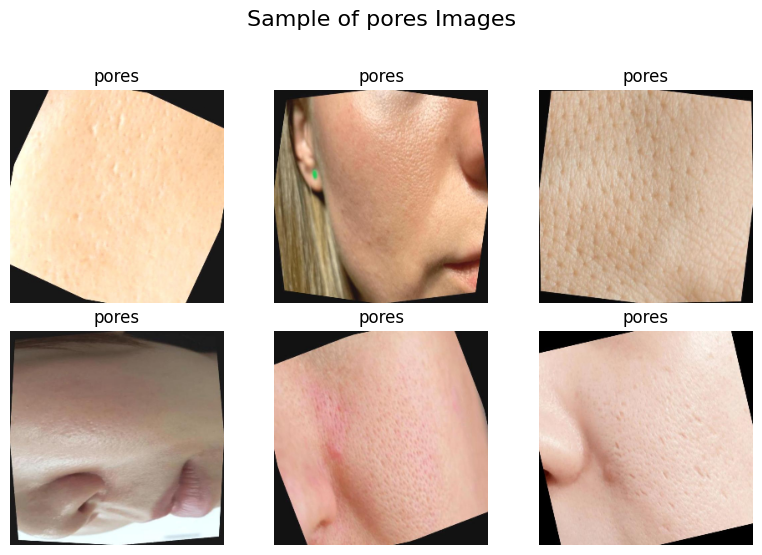

In [18]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[3]} Images', fontsize=16)

for i in range(6):
    plt.subplot(3, 3, i + 1)
    Category_List = np.where(Labels == 3)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  
    plt.title(f'{Class_Names[3]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

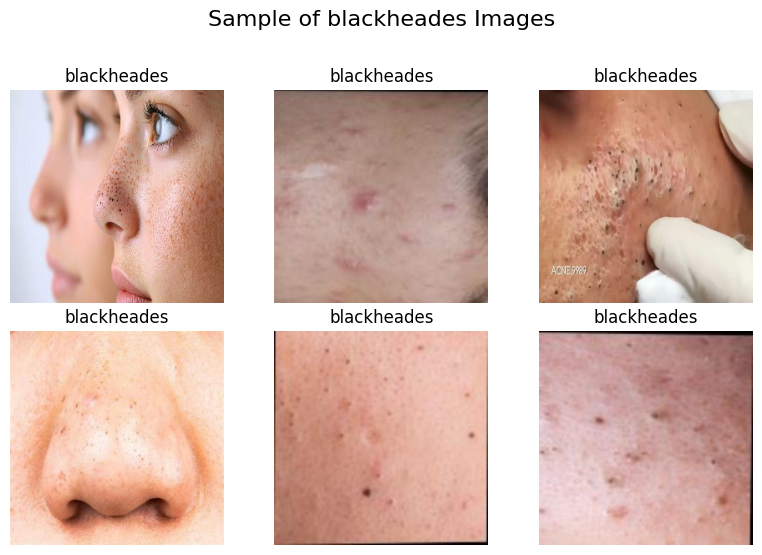

In [19]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[4]} Images', fontsize=16)

for i in range(6):
    plt.subplot(3, 3, i + 1)
    Category_List = np.where(Labels == 4)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  
    plt.title(f'{Class_Names[4]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Model Custom CNN</h2>
</div>

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   brightness_range=[0.8, 1.2],
                                   )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(x=Train_Images,
    y=Train_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,   
)

val_generator = val_datagen.flow(x=Val_Images,
    y=Val_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

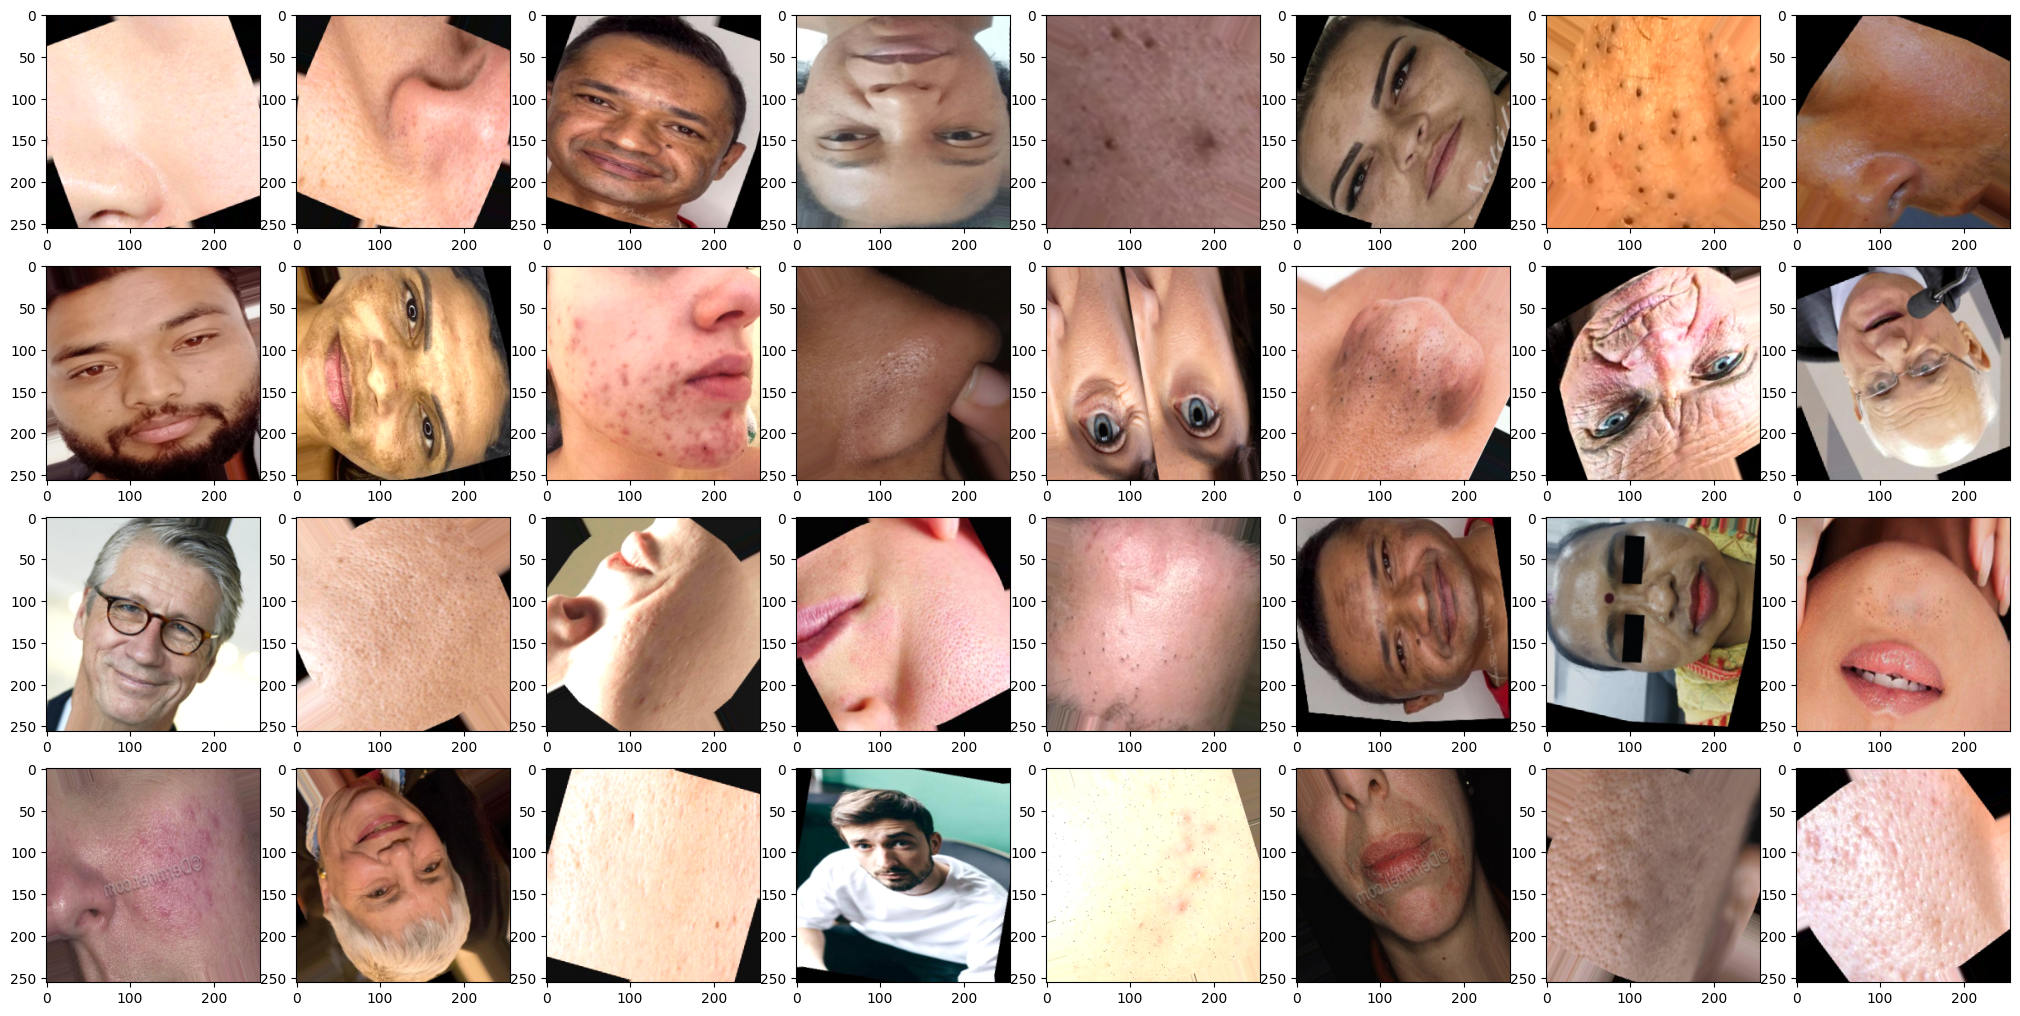

In [56]:
for x , y in train_generator:
    plt.figure(figsize=(20,20))
    for i in range(32):
        plt.subplot(8,8,i+1)
        plt.imshow(x[i])
        plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)
    break

In [33]:
KerasModel = keras.models.Sequential([
    # Block 1
    keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(32, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPooling2D((2,2)),

    # Block 2
    keras.layers.Conv2D(64, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(64, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPooling2D((2,2)),

    # Block 3
    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPooling2D((2,2)),

    # Block 4
    keras.layers.Conv2D(256, (3,3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.MaxPooling2D((2,2)),

    # Dense Head
    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3), 

    keras.layers.Dense(5, activation='softmax')
])

In [34]:
KerasModel.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
best_model_callback = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = KerasModel.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[
        early_stopping_callback,
        best_model_callback,
        learning_rate_reduction
    ])

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 129s 545ms/step - accuracy: 0.5419 - loss: 1.3031 - val_accuracy: 0.2014 - val_loss: 2.1398 - learning_rate: 0.0010
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 110s 515ms/step - accuracy: 0.7052 - loss: 0.8009 - val_accuracy: 0.4253 - val_loss: 1.4267 - learning_rate: 0.0010
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 107s 498ms/step - accuracy: 0.7517 - loss: 0.6819 - val_accuracy: 0.7140 - val_loss: 0.7837 - learning_rate: 0.0010
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 106s 496ms/step - accuracy: 0.7774 - loss: 0.6396 - val_accuracy: 0.6416 - val_loss: 1.6993 - learning_rate: 0.0010
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.7878 - loss: 0.5924
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
214/214 ━━━━━━━━━━━━━━━━━━━━ 105s 490ms/step - accuracy: 0.7878 - loss: 0.5923 - val_accuracy: 0.6253 - val_loss: 1.0617 - learning_rate: 0.0010
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 110s 515ms/step - acc

#### Summary of KerasModel

In [36]:
print(KerasModel.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 256)    │       295,16

 Total params: 102,428,785 (390.73 MB)

 Trainable params: 34,142,117 (130.24 MB)

 Non-trainable params: 2,432 (9.50 KB)

 Optimizer params: 68,284,236 (260.48 MB)

None


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluate Custom CNN</h2>
</div>



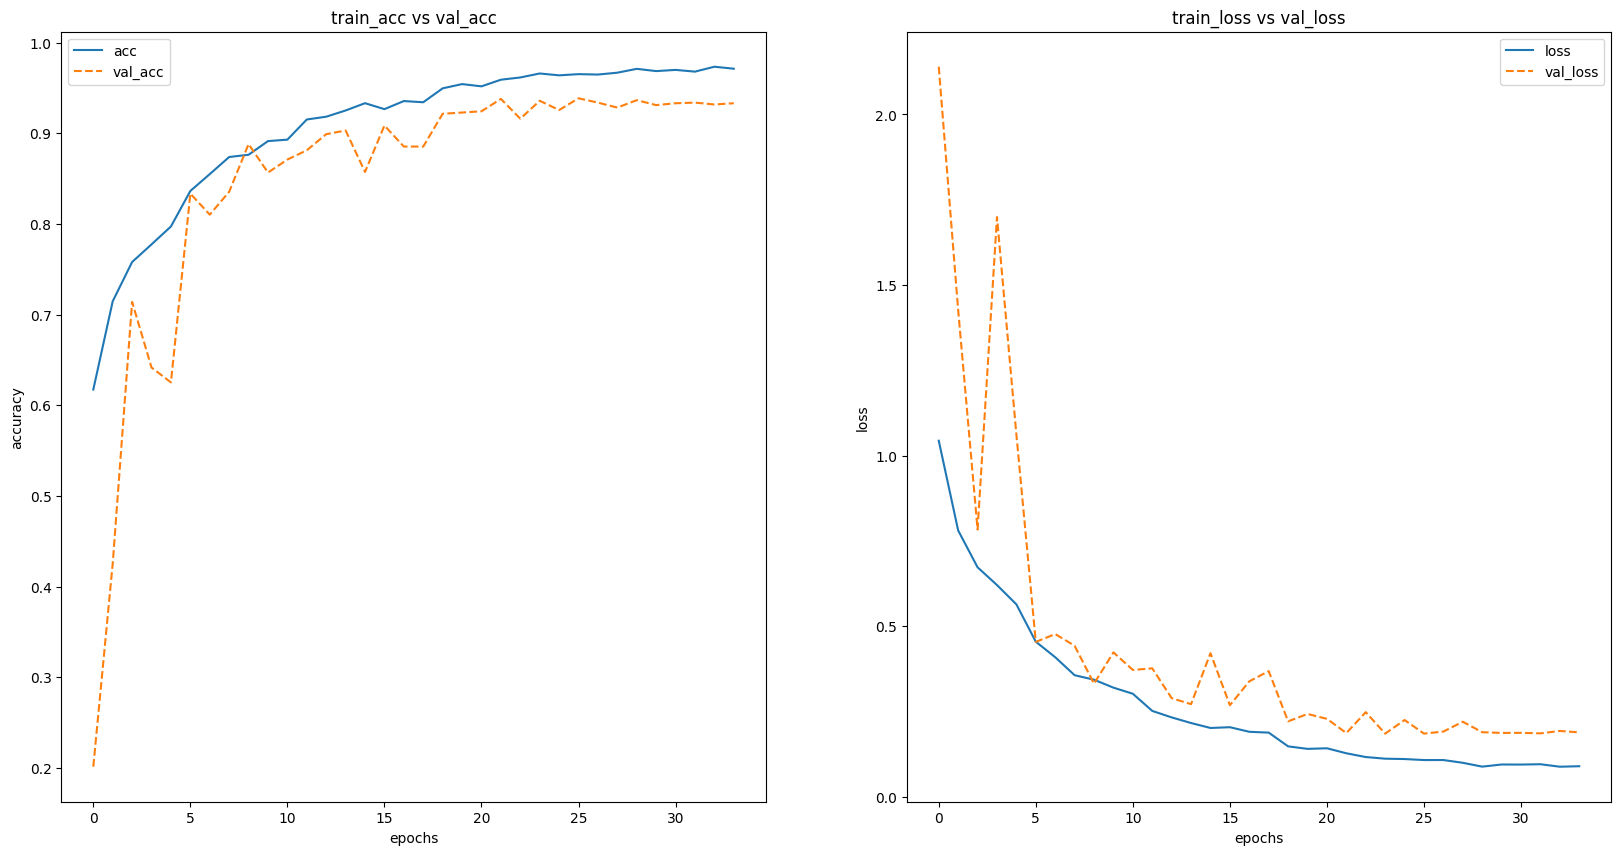

In [37]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history) 

In [38]:
model = keras.models.load_model('best_model.h5')
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step


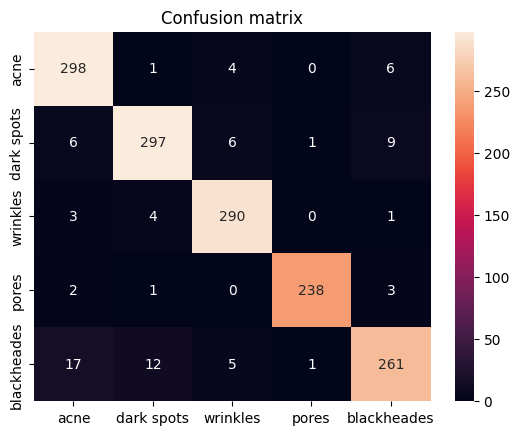

In [39]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels = Class_Names, 
           yticklabels = Class_Names,
           ax = ax,           
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [40]:
print(classification_report(Test_Labels, pred_labels,target_names = Class_Names))

              precision    recall  f1-score   support

        acne       0.91      0.96      0.94       309
  dark spots       0.94      0.93      0.94       319
    wrinkles       0.95      0.97      0.96       298
       pores       0.99      0.98      0.98       244
 blackheades       0.93      0.88      0.91       296

    accuracy                           0.94      1466
   macro avg       0.95      0.95      0.95      1466
weighted avg       0.94      0.94      0.94      1466



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting with Custom CNN</h2>
</div>



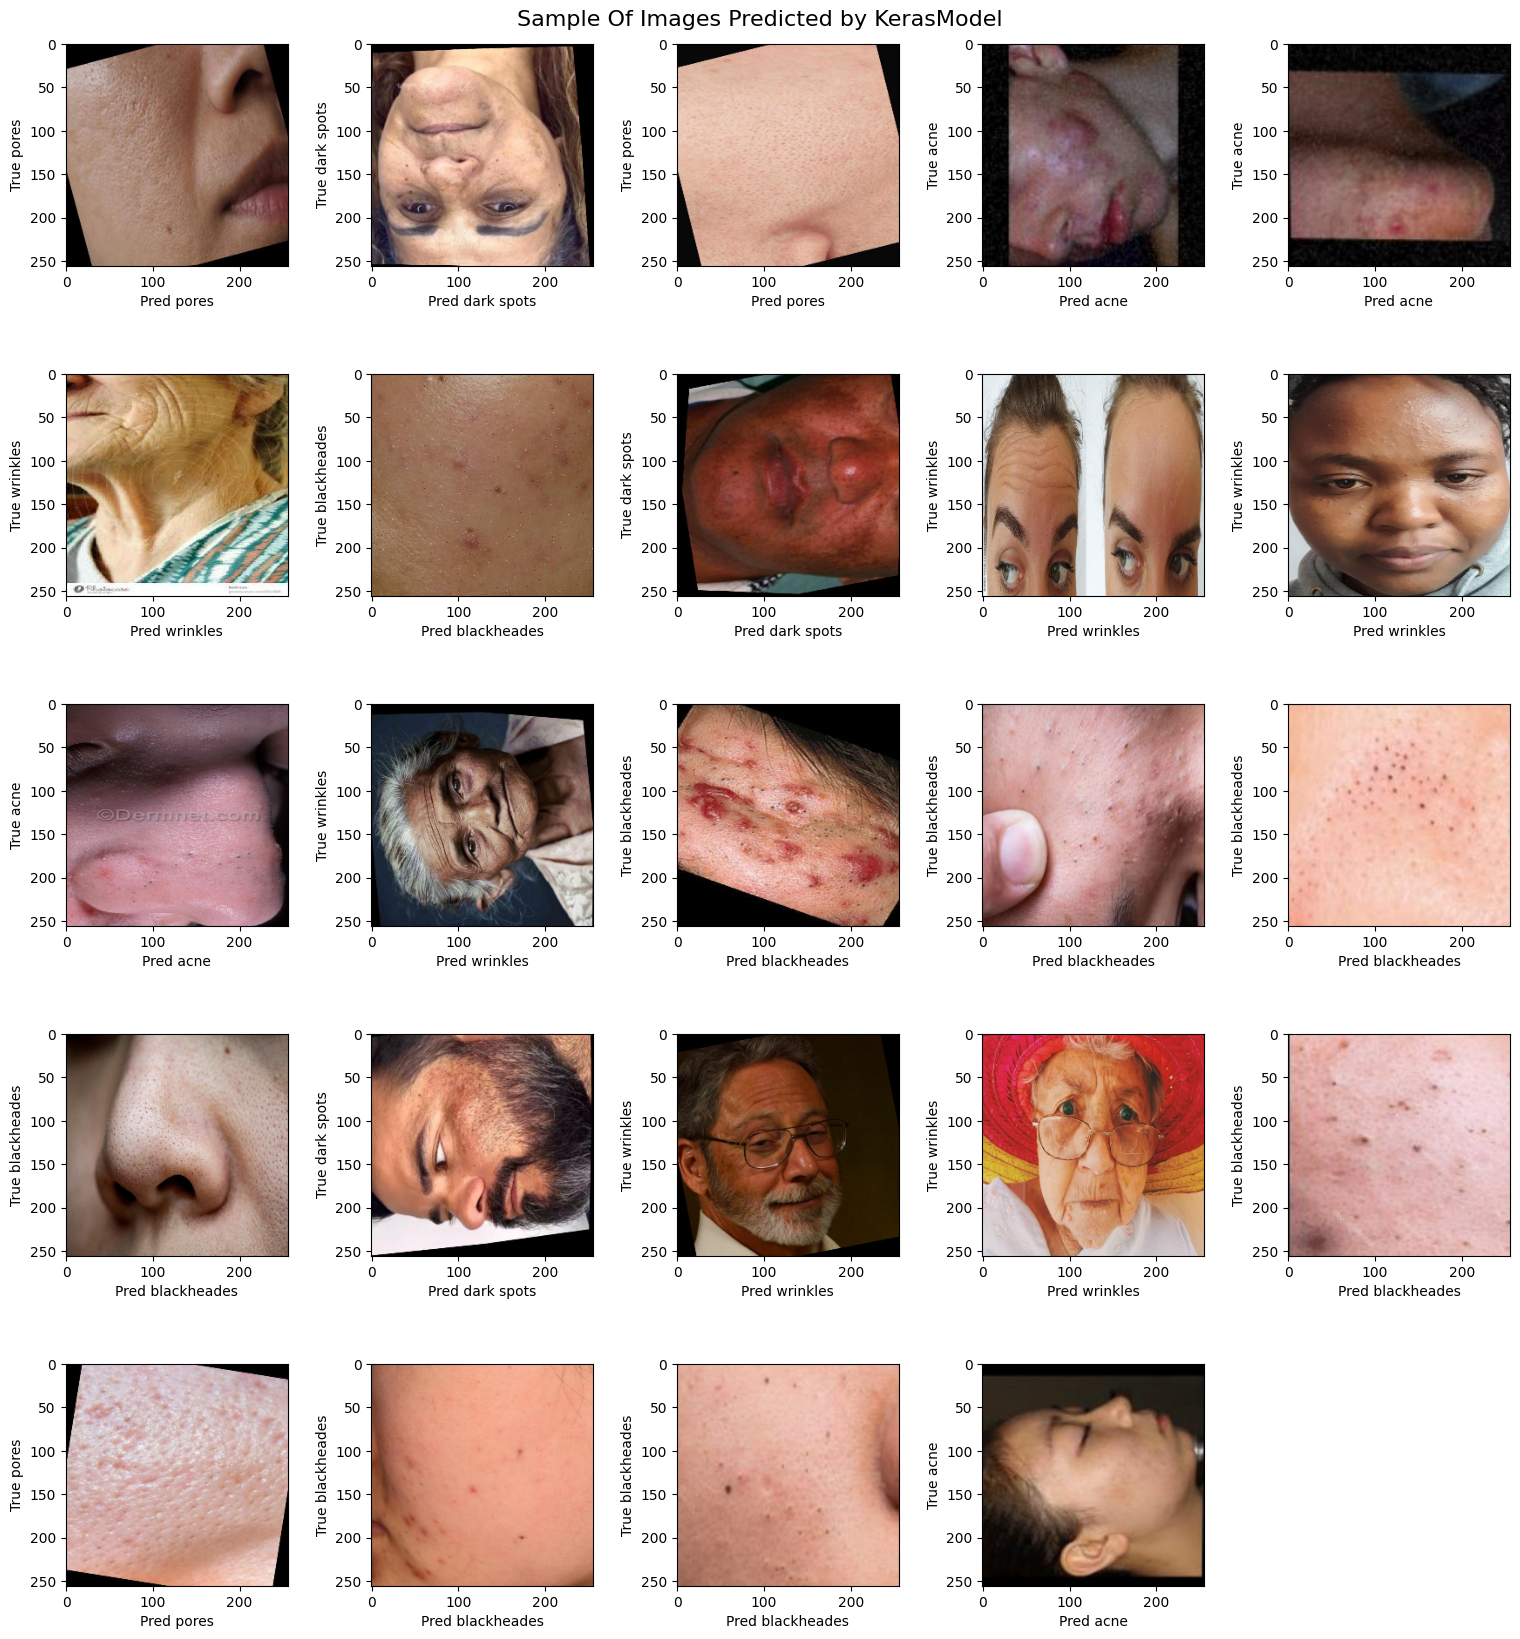

In [41]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by KerasModel" , fontsize=16)

for i in range(24):
    plt.subplot(6,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)